In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import functools as ft
import plotly.express as px
%matplotlib inline
from collections import defaultdict
CLIENT_ID = "c84348e3a90647b1a6a42464861e7ce1"
CLIENT_SECRET = "62f619cda51b4a7b8e33e757fe18480c"


In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

In [3]:
id_information = pd.read_csv('../data/id_information.csv', sep='\t')
id_tags = pd.read_csv('../data/id_tags.csv', sep='\t')
id_genres = pd.read_csv('../data/id_genres.csv', sep='\t')
id_metadata = pd.read_csv('../data/id_metadata.csv', sep='\t')
id_lang = pd.read_csv('../data/id_lang.csv', sep='\t')

In [4]:
def full_info_to_csv():
    """
    This function creates csv of metadata for songs by spotify API.
    The function uses Spotipy to fetch audio features and metadata for the specified song.
    """
    info_from_spotify = pd.DataFrame()
#     for index, row in id_metadata.iterrows():
        # print(row['spotify_id'])
#         print(index)
#         info_from_spotify.append(sp.audio_features(row['spotify_id']))
        # print(sp.audio_features(row['spotify_id']))

    dfs = [id_information, id_tags, id_genres, id_lang]
    info_from_spotify.to_csv('../data/info_from_spotify.csv')
    # full_info = ft.reduce(lambda left, right: pd.merge(left, right, on='id'), dfs)
    # full_info.to_csv('../data/full_info.csv')
    # return pd.DataFrame(song_data)


In [5]:
# full_info_to_csv()

## Songs through years

In [6]:
id_metadata.release.unique()

array([2009, 2013, 1974, 2017, 2010, 2016, 2008, 2018, 2012, 2019, 2011,
       2007, 2005, 2004, 1998, 2015, 1996, 1985, 2014, 1997, 2003, 1984,
       1969, 1977, 2001, 2006, 2000, 2002, 1986, 1991, 1994, 1958, 1960,
       1976, 1995, 1975, 1990, 1983, 1989, 1999, 1981, 1971, 1963, 1979,
       1988, 1992, 1978, 1970, 1987, 1972, 1993, 1980, 1956, 1967, 1964,
       1973, 1962, 1982, 1966, 1933, 1968, 1959, 1955, 1965, 1935, 1961,
       1957, 1954, 1928, 1936, 1013, 1937, 1949, 1929, 1938, 1951, 1953,
       1926, 1950, 1945, 1948, 1943, 1899, 1952, 1944, 1900, 1930, 1923])

In [7]:
# chybne data Los Espiritus 1013 je 2013
id_metadata.loc[id_metadata['release'] == 1013]

,id,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
10350,5pClePd8cdUOGQe2,45LCjFwH5veyV1twkPFKVO,35.0,1013,0.595,0.761,7.0,0.0,0.868,166.503,268507
13762,7oBqYSOUt2PehcJd,0ytnXiwu42kNYnBvS48nc5,27.0,1013,0.443,0.688,7.0,1.0,0.717,95.729,296680
83679,lUJHN9keOtaNGCYK,5sFEbn2q1dI0xO06BKkcH1,40.0,1013,0.639,0.512,8.0,0.0,0.598,127.451,299880


In [8]:
# chybne data Los Espiritus 1013 je 2013
id_metadata.loc[id_metadata['release'] == 1899]

,id,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
62143,ZEuwJ4wJH5GW6ay9,09sKCJcVUC24vgpaamdkrj,30.0,1899,0.548,0.335,9.0,0.0,0.656,98.688,162067


In [9]:
id_information.loc[id_information['id'] == 'ZEuwJ4wJH5GW6ay9']

,id,artist,song,album_name
62143,ZEuwJ4wJH5GW6ay9,Bukka White,Parchman Farm Blues,Good Gin Blues


In [10]:
id_information.loc[id_information['id'] == '5pClePd8cdUOGQe2']

,id,artist,song,album_name
10350,5pClePd8cdUOGQe2,Los Espíritus,Lo Echaron del Bar,Los Espíritus


In [11]:
id_information.loc[id_information['id'] == '7oBqYSOUt2PehcJd']

,id,artist,song,album_name
13762,7oBqYSOUt2PehcJd,Los Espíritus,Jesús rima con cruz,Los Espíritus


In [12]:
id_information.loc[id_information['id'] == 'lUJHN9keOtaNGCYK']

,id,artist,song,album_name
83679,lUJHN9keOtaNGCYK,Los Espíritus,noches de verano,Los Espíritus


In [13]:
song_by_year = id_metadata.groupby('release')

In [21]:
id_metadata.groupby('release').size()

release
1013        3
1899        1
1900        1
1923        1
1926        1
        ...  
2015     5587
2016     6796
2017     8206
2018    10525
2019     3838
Length: 88, dtype: int64

<AxesSubplot:title={'center':'Songs by years'}, xlabel='year', ylabel='size'>

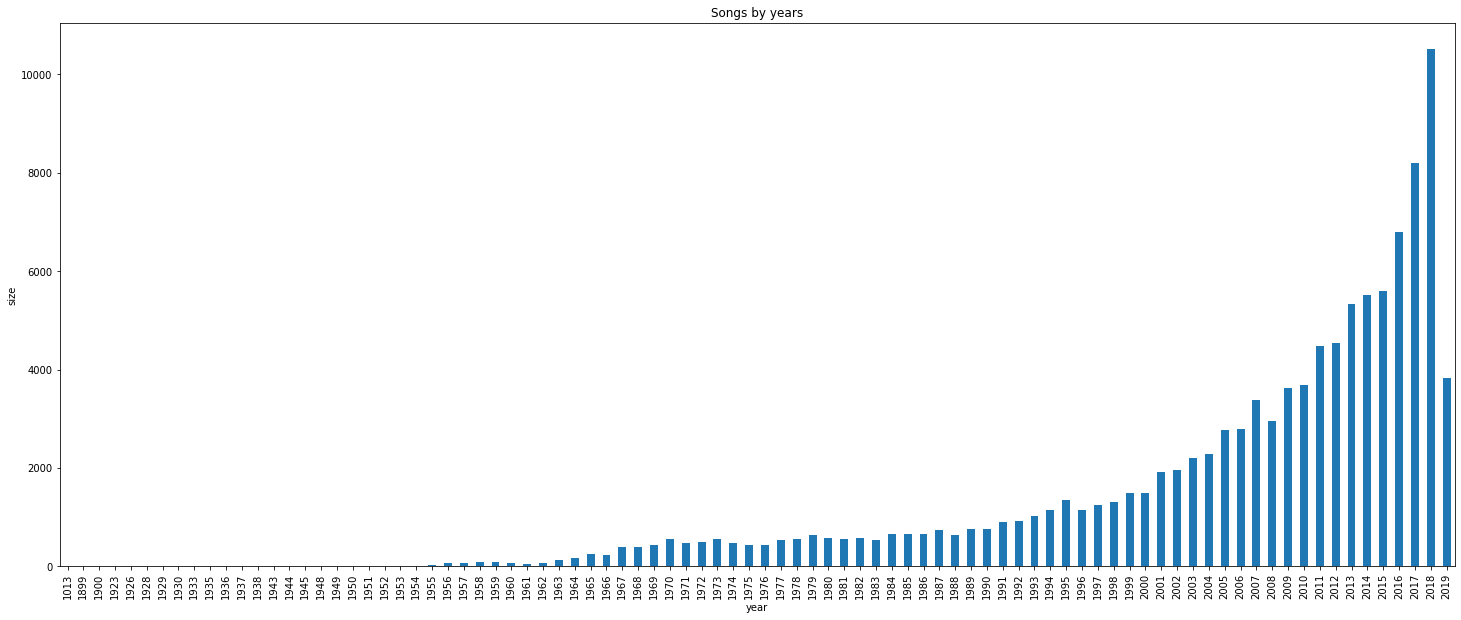

In [36]:
id_metadata.groupby('release').size().plot(kind='bar', title='Songs by years',
                                           ylabel='size', xlabel='year', figsize=(25, 10))


<AxesSubplot:title={'center':'Songs by years'}, xlabel='year', ylabel='size'>

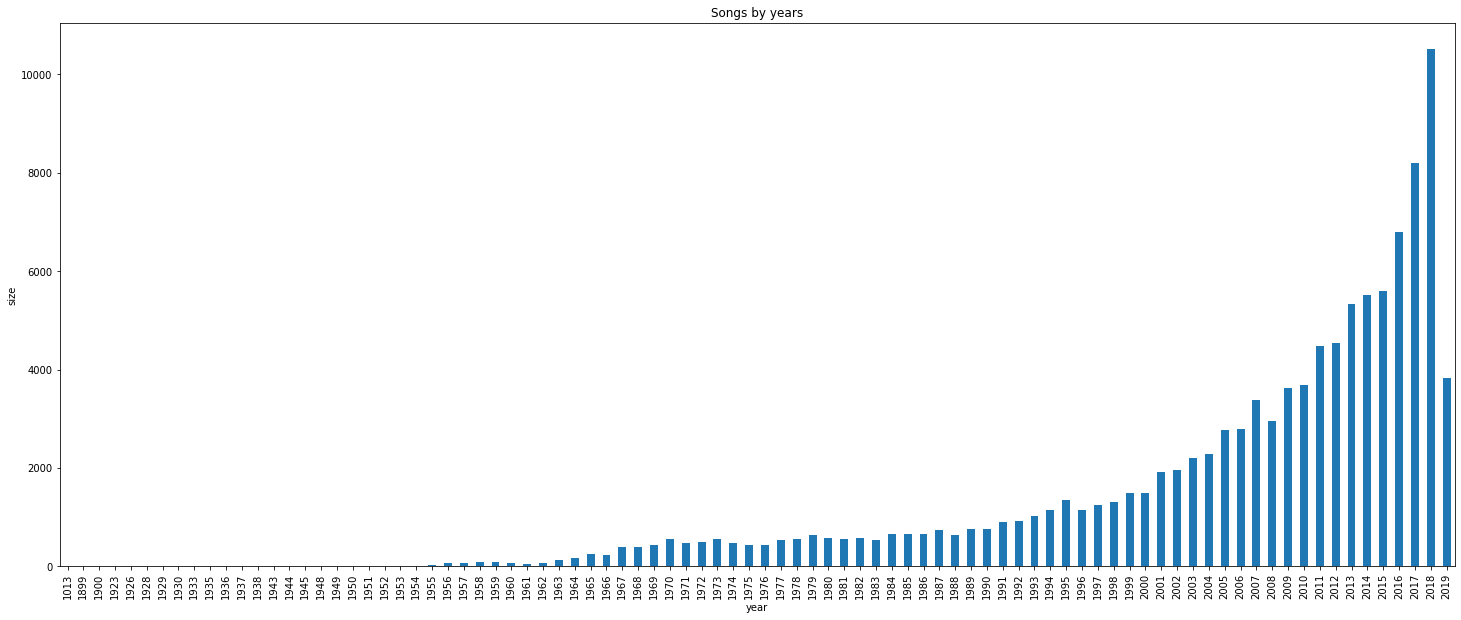

In [40]:
id_metadata.groupby('release').size().plot(kind='bar', title='Songs by years',
                                           ylabel='size', xlabel='year', figsize=(25, 10))